In [1]:
import os
import torch
from PIL import Image
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
# Define the model again (same as before)
class CatsDogsMLP(nn.Module):
    def __init__(self):
        super(CatsDogsMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(64 * 64 * 1, 512)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.output = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [3]:
# Instantiate model and load weights
model = CatsDogsMLP()
model.load_state_dict(torch.load("cats_dogs_mlp.pth", map_location=torch.device('cpu')))
model.eval()

# Define the same transform used in training
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])


In [4]:
# Paths to sample image folders
cat_folder = r"dataset\sample_images\cats"
dog_folder = r"dataset\sample_images\dogs"

image_paths = []
for folder in [cat_folder, dog_folder]:
    for file in os.listdir(folder):
        if file.endswith((".png", ".jpg", ".jpeg")):
            image_paths.append(os.path.join(folder, file))
            
def predict_image(image_path):
    try:
        image = Image.open(image_path).convert('L')
        image_tensor = transform(image).unsqueeze(0)
        with torch.no_grad():
            output = model(image_tensor)
            prob = output.item()
            label = "Dog" if prob >= 0.5 else "Cat"
            return label, prob
    except FileNotFoundError:
        print("Image file not found!")
        return None, None
    except Exception as e:
        print(f"Error: {e}")
        return None, None

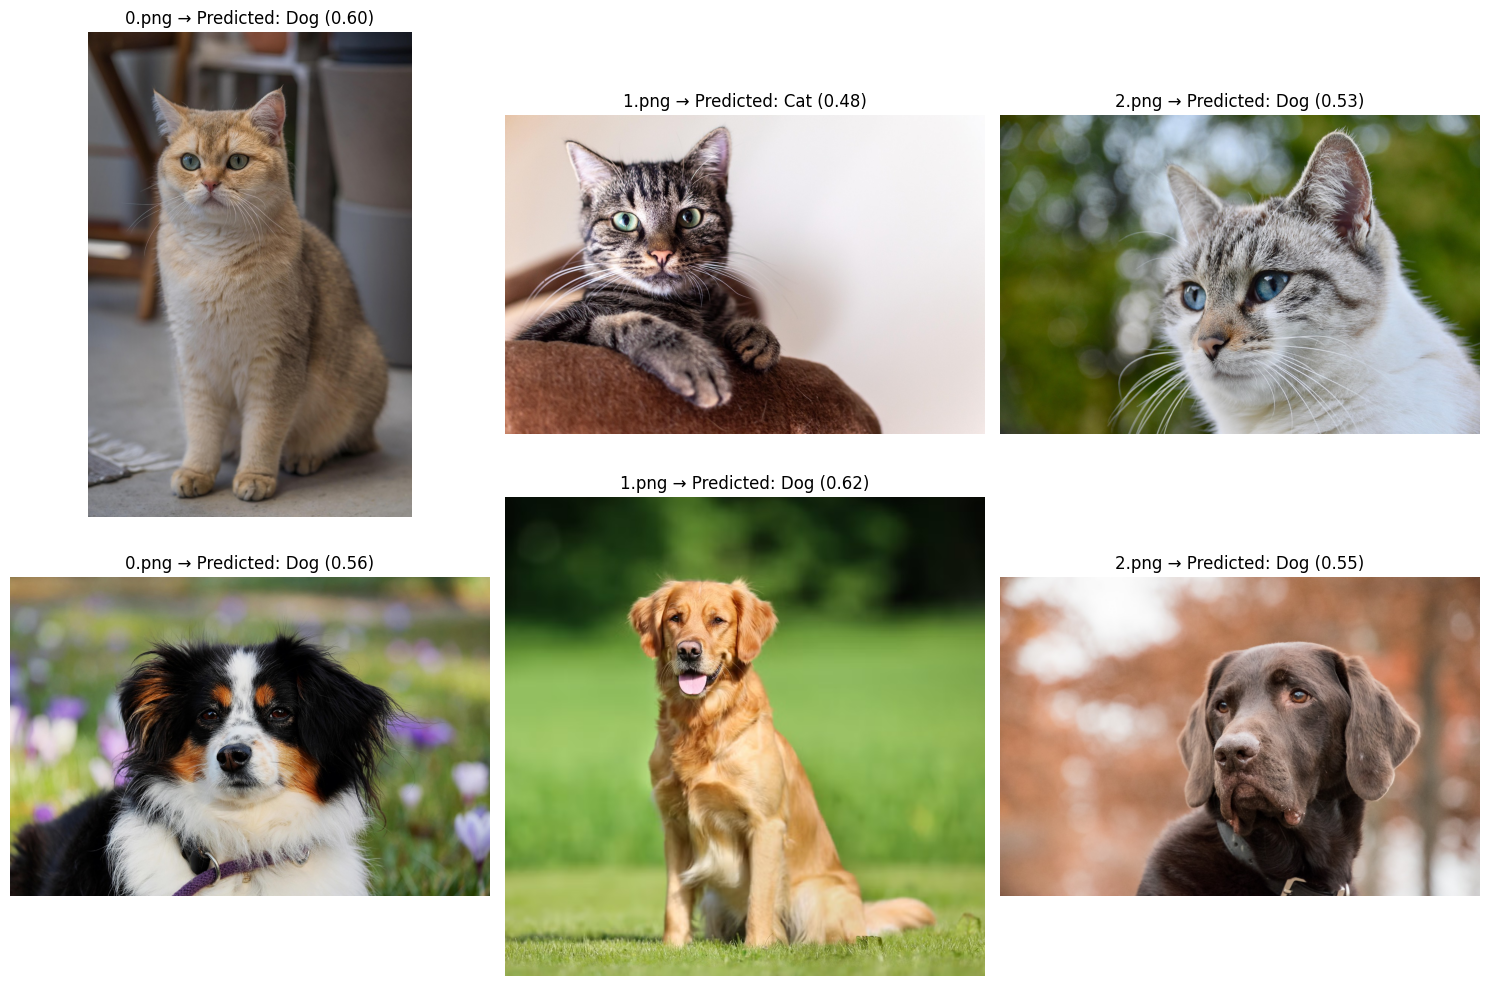

In [5]:
# Display predictions

plt.figure(figsize=(15, 10))

for i, path in enumerate(image_paths, 1):
    label, prob = predict_image(path)
    img = Image.open(path)
    plt.subplot(2, 3, i)
    plt.imshow(img, cmap="gray")
    plt.title(f"{os.path.basename(path)} → Predicted: {label} ({prob:.2f})")
    plt.axis("off")
    
plt.tight_layout()
plt.savefig('Cats_dogs_classifications.jpg')
plt.show()